## Homework 6, Problem 1 on reaching data and neural data

ECE C143A/C243A, Spring Quarter 2018, Prof. J.C. Kao, TAs T. Monsoor, X. Jiang and X. Yang.

Total: 20 points

Download the dataset `JR_2015-12-04_truncated2.mat` from CCLE.

This data structure contains simultaneous reaching (kinematic) data and neural data.
A large part of this question will be getting acquainted with this data.

Loading the downloaded file will drop a variable called `R`, in your Python workspace.
We will call this variable the R-dict (or sometimes R-struct).

It is an array of dictionaries, with each dictionary in the array corresponding to one trial performed by Monkey J. In this data, Monkey J is performing a reaching task in which he acquires a center target, and then a peripheral target. After acquiring the peripheral target, he comes back to acquire the center target, and then acquires another peripheral target. This task is called a "center-out-and-back" task as the monkey continuously reaches from the center to a peripheral target, and then back to the center.

This assignment incorporates the `scipy` package.  If you do not have it installed, you can install it by running:

`pip install scipy`

You may also install a package compiler for scientific computing, like `anaconda`: https://www.anaconda.com/download/

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.io as sio
import math
import nsp as nsp
# Load matplotlib images inline
%matplotlib inline
# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2
data = sio.loadmat('JR_2015-12-04_truncated2.mat') # load the .mat file.
R = data['R'][0,:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### (a) (1 point) How many trials?

How many trials were performed by Monkey J in this R-struct?

In [2]:
print("Number of trails",len(R))

Number of trails 506


Answer: 506

### (b) (2 point) Where are the targets?

`R[i]['target']` is the target that Monkey J reached to on trial `i`.  How many unique targets are there?  Please provide a 2D plot of all the target locations.  Ignore the 3rd dimension ($z$-location) which is by default set at $-70$ (i.e., it was not used). The units of `R[0,i]['target']` are in millimeters.


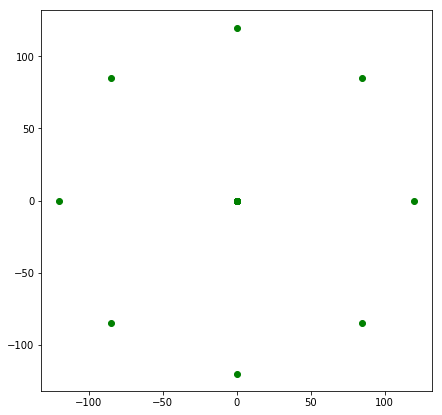

In [39]:
import math
plt.figure(figsize=(7,7))
X,Y = [],[]
pos = {}
for i in range(R.shape[0]):
# calculate reach angle
    x = R[i]['target'][0][0]
    y = R[i]['target'][1][0]
    theta = math.atan2(y,x)*180/np.pi
    if theta < 0:
        theta += 360
# add trial to reach angle
    if x == 0 and y == 0:
        X.append(x)
        Y.append(y)
        continue
    elif theta in pos:
        pos[theta].append(i)
    else:
        pos[theta] = [i]
        X.append(x)
        Y.append(y)
plt.plot(X, Y, 'go')
plt.show()

Question: How many unique targets(including the center target) are there?

Answer: 9

### (c) (1 point) How many failures?

`R[i]['isSuccessful']` indicates if Monkey J successfully acquired the target on trial $i$.  This means that he reaches to the target and holds his position within a $4$cm by $4$cm box centered around the target for $500$ms.  How many failures are there in this R-struct? 

Hint: `isSuccessful` attribute has the dtype of uint8. Be careful about data types; in general it's always good practice to perform operations on same data types.  If the number of trials is encoded as an `int`, you should cast the `isSuccessful` variable to be an int. You may achieve this by calling `isSuccessful = np.asarray(R['isSuccessful'], dtype=int)`.

In [4]:
unsucess = 0
for i in range(len(R)):
    unsucess += not(np.array(R[1]['isSuccessful'],dtype=int))
print(unsucess)

0


Question: How many failures are there in this R-struct?

Answer: 0

### (d) (2 points) Kinematic sampling. [Code is provided; but you still need to analyze the output and answer the question]

`R[i]['cursorPos']` is a $3 \times T_i$ matrix that contains the monkey's hand position over time on trial $i$, where $T_i$ is the length of trial $i$ in milliseconds. 

* The 1st row is the $x$ position and the 2nd row is the $y$ position of Monkey J.
* The units are in millimeters.
* Ignore the 3rd row -- which is $z$ position (set to $-70$ mm by default in this data).
* Each column represents $1$ ms.  That is, if $T_i = 1032$, this indicates that the trial lasted for $1032$ milliseconds. Note that `R[i]['cursorPos'][:,-1]` and `R[i+1]['cursorPos'][:,0]` are also separated by $1$ ms, so that the R-struct contains millisecond resolution data and no segments of time are unobserved.
* The kinematics in `R[0,i]['cursorPos']` are sampled from a system called 'Polaris' that tracks a bead taped on the monkey's finger.
		
Observe the values of `R[i]['cursorPos']`.
Does the ''Polaris'' system sample the monkey's kinematics at $1$ ms resolution (i.e., $1000$ Hz)?
If not, approximately at what frequency does Polaris sample the kinematics?        

In [5]:
#set printoption so that you can view the whole array by call print 
np.set_printoptions(threshold=np.nan)
#====================================================#
# YOUR CODE HERE:
#   Analysis the frequency of sampling
#====================================================#
i=1
print(R[i]['cursorPos'][:,0:200]) 

[[  1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73
    1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96
    1.96   1.96   1.96   1.96   1.96   1.96   2.23   2.23   2.23   2.23
    2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23
    2.23   2.23   2.23   2.47   2.47   2.47   2.47   2.47   2.47   2.47
    2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47
    2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66
    2.66   2.66   2.66   2.66   2.66   2.66   2.83   2.83   2.83   2.83
    2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83
    2.83   2.83   2.83   2.93   2.93   2.93   2.93   2.93   2.93   2.93
    2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93
    2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99
    2.99   2.99   2.99   2.99   2.99   2.99   3.05   3.05   3.05   3.05
    3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05

Question: Does the 'Polaris' system sample the monkey's kinematics at  1  ms resolution (i.e., 1000Hz)? If not, approximately at what frequency does Polaris sample the kinematics?

Answer: No. The period is about 16.5 ms and the frequency is 60.606 Hz

### (e) (1 points) Reach trajectories.

Present a 2D plot showing Monkey J's hand position across the entire R-dict. Does it look like the plot of a center-out-and-back task?

Text(0.5,1,'Hand positions x vs y')

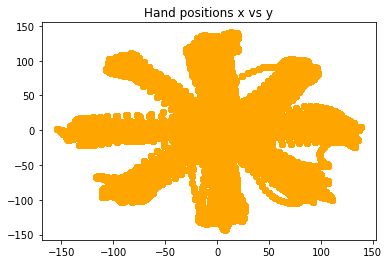

In [11]:
x_pos = []
y_pos = []
for i in range(len(R)):
    for j in range(R[i]['cursorPos'].shape[1]):
        x_pos.append(R[i]['cursorPos'][0,j])
        y_pos.append(R[i]['cursorPos'][1,j])
plt.scatter(x_pos,y_pos, color = 'orange')
plt.title('Hand positions x vs y')

Question: Does it look like the plot of a center-out-and-back task?

Answer:Yes


### (f) (1 points) Number of electrodes.

The R-struct contains neural data recorded from electrode arrays implanted in Monkey J's motor cortex.

We'll only consider `R[i]['spikeRaster']`, which is an $N \times T_i$ matrix of activity from primary motor cortex (M1).

(There is an `R[i]['spikeRaster2']`, which we will ignore. It contains activity from PMd.)

There are $N$ electrodes, and each electrode is measuring spiking activity. Each row of `R[i]['spikeRaster']` corresponds to the spiking activity, at millisecond resolution, for Monkey J. If the value of row $n$ and column $t$ is 1, then it indicates that a neuron spiked on electrode $n$ at time $t$. If the value of this entry is 0, it indicates that no spike occurred on electrode $n$ at time $t$.

Note that we store `R[i]['spikeRaster']` as a sparse matrix, since a neuron is often not spiking (corresponding to $0$'s).

It is more memory efficient to store the locations of the non-zero values in the matrix than to store the entire matrix.

In Python, one may use the command `.todense()` to make this a standard matrix.

How many electrode channels are there?         

In [7]:
print(R[0]['spikeRaster'].shape)
print(R[0]['spikeRaster'].shape[0])

(96, 901)
96


Question: How many electrode channels are there?     

Answer:96

### (g) (4 points) Spike raster. [Code solution provided; please understand it]

Plot a spike raster of all reaches to the right target, located at (120 mm,0 mm), for electrode 17.          
(Hint: use the `nsp.PlotSpikeRaster` function in `nsp.py`.)     

Text(0.5,1,'Spike Raster')

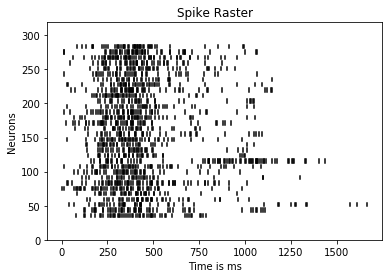

In [8]:
#====================================================#
# YOUR CODE HERE:
#  Generate spike raster of all reaches to the right target
#====================================================#
trial_num = len(R)
spike_train = np.empty((0,0),dtype = list)
f = 0
for i in range(trial_num):
    target = R[i]['target'][0:2]    
    if target[0]==120 and target[1]== 0 :
        spike_train = np.append(spike_train,0)
        spike_train[f] =  R[i]['spikeRaster'][16,:].todense().nonzero()[1]
        f = f + 1
nsp.PlotSpikeRaster(spike_train)
plt.xlabel('Time is ms')
plt.ylabel('Neurons')
plt.title('Spike Raster')
#====================================================#
# END YOUR CODE
#====================================================#

### (h) (4 points) ISI distribution.

Plot the ISI distribution for electrode 17 across all trials in the R-dict (i.e., one ISI histogram with data from all reaches).  
Make the ISI histogram bins $10$ ms wide. Did we spike sort this neural data?

(array([  5.05900000e+03,   3.23000000e+03,   1.97500000e+03,
          1.10400000e+03,   6.94000000e+02,   4.70000000e+02,
          3.30000000e+02,   2.54000000e+02,   1.65000000e+02,
          1.53000000e+02,   1.15000000e+02,   9.90000000e+01,
          8.60000000e+01,   7.50000000e+01,   6.30000000e+01,
          5.20000000e+01,   4.10000000e+01,   3.20000000e+01,
          4.20000000e+01,   3.20000000e+01,   2.40000000e+01,
          2.30000000e+01,   1.80000000e+01,   1.30000000e+01,
          1.20000000e+01,   1.60000000e+01,   1.40000000e+01,
          7.00000000e+00,   1.10000000e+01,   8.00000000e+00,
          1.00000000e+01,   5.00000000e+00,   5.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
        

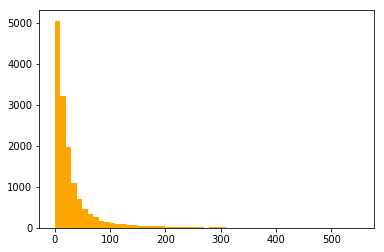

In [9]:
ISI = []
for i in range(506):
    spike_train = R[i]['spikeRaster'][16,:].todense().nonzero()[1]
    for j in range(1,len(spike_train)):
        ISI.append(spike_train[j]-spike_train[j-1])

bins = np.arange(0,max(ISI),10)
plt.hist(ISI, bins=bins,color = 'orange')

Question: Did we spike sort this neural data?

Answer:   No. If this is the result of one neuron, we will be able to see the refractory period in the plot. However, the refractory period is not shown in the picture. 


### (i) (4 points) PSTH.

Plot the average firing rate for each of 8 unique peripheral reach directions for electrode 17.

To do so, we have provided a binning function, `nsp.bin` which takes a spike raster matrix and counts the spikes in non-overlapping windows of some length $\Delta t$ (to be specified as an input) for each neuron.

Do the following: 
* Call `nsp.bin` in the correct way to bin the spikes in non-overlapping $25$ ms bins.
* Then, for each of the $8$ unique center-out reach conditions, average the binned spike counts for electrode 17, from $t=0$ to $500$ ms.
* For each of these traces, smooth them by using smooth function in `nsp.smooth` with `window_len = 5`, i.e., if one of these 8 traces was stored as the variable `trace`, you would call `trace = nsp.smooth(trace, window_len = 5)`.
* You should now have 8 traces of averaged binned spike counts for electrode 17.
* Plot these average, smoothed, firing rates through time on the same plot (x-axis time in ms, y-axis firing rate; be sure to get the unit scale correct. Use a different color for each of the 8 reach conditions. Note, these trial-averaged plots of the firing rate are often called peri-stimulus time histograms, or PSTHs. We do this to visualize the data and be sure it makes sense.

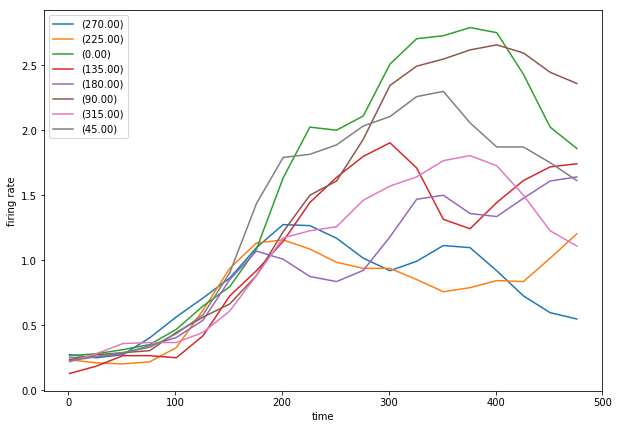

In [46]:
plt.figure(figsize=(10,7))
binWidth = 25
time = np.arange(1, 501, 25)
for theta in pos:
    list_sum_firing_rates = []
    for i in pos[theta]:
        X = R[i]['spikeRaster'][16, 0:500]
        sum_firing_rates = nsp.bin(X, binWidth, 'sum')[0]
        list_sum_firing_rates.append(sum_firing_rates)
    trace = np.mean(list_sum_firing_rates, axis = 0)
    trace = nsp.smooth(trace, window_len = 5)
    plt.plot(time, trace, label = '(%.2f)'%(theta))
plt.legend( loc = 'upper left')
plt.xlabel('time')
plt.ylabel('firing rate')
plt.show()